In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [45]:
df_DS_PK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='Pakistan')].copy()



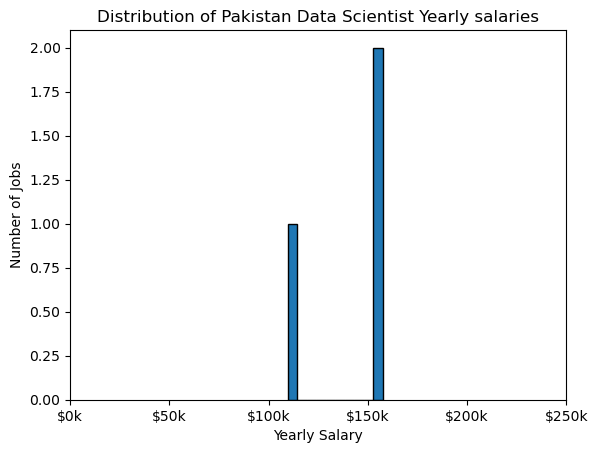

In [48]:
df_DS_PK['salary_year_avg'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.title("Distribution of Pakistan Data Scientist Yearly salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()